# Neural Networks

## Motivation

Neural Networks: General-purpose learning algorithm for modeling non-linearity

... if you train it with "enough" data

## Non-linear inputs

- Images
- Text
- Speech
- XOR

## Limitations of linear models

Not "linearly separable"

![xor](assets/neural/xor.png)

Can't draw boundary to separate x's and o's

## Modeling non-linearity

Transform $x$ into $\phi(x)$ to become linearly separable

![xor](assets/neural/xor_phi.png)

$\phi(x)$ is the basis for a "neuron"

## Neuron

$$y = W\phi(x) + b$$

$$\phi(x) = g(W'x + b')$$

Trainable: $W', b', W, b$

$g(x)$ is a non-linear function, e.g. Sigmoid

$$y = sigmoid(W(x) + b)$$


$$y = relu(W(x) + b)$$

## Neuron (Perceptron)

![neuron](assets/neural/neuron.png)

(image: Neural Network Methods in Natural Language Processing, Goldberg, 2017)

## Neural Network

Multiple neurons in 1 layer make up an "Artificial Neural Network"

![neural network](assets/neural/300px-Colored_neural_network.svg.png)

(image: [Wikipedia](https://en.wikipedia.org/wiki/Artificial_neural_network))

## Neural Network (Deep)

Multiple "hidden" layers of neurons make up a "Deep Neural Network"

![multi-layer perceptron](assets/neural/deep_nn.png)

(image: Goldberg, 2017)

## Properties of a Neural Network

|Term|Description|Examples|
|--|--|--|
|Input dimension|How many inputs|4|
|Output dimension|How many outputs|3|
|Number of hidden layers|Number of layers, excluding input and output|2|
|Activation type|Type of non-linear function|sigmoid, ReLU, tanh|
|Hidden layer type|How the neurons are connected together|Fully-connected, Convolutional|

## Activation types

What non-linearity is applied

![dnn](assets/neural/activations.png)

(image: Goldberg, 2017)

## Layer types

How the neurons are connected together, and what operations are performed with x, W, and b:

- Dense
- Convolutional
- Recurrent
- Residual

More detail to come...

## Walkthrough: Neural Network Architectures in keras

In this walkthrough, we will use Keras to examine the architecture of some well-known neural networks.

### Setup - Conda environment (from scratch)

1. Create a new conda environment called `mldds03`
  a. Launch an `Anaconda Python` command window
  b. `conda create -n mldds03 python=3`
2. Activate the conda environment: `conda activate mldds03`
3. Install: `conda install jupyter numpy pandas matplotlib keras pydot python-graphviz`
4. Navigate to the courseware folder: `cd mldds-courseware`
5. Launch Jupyter: `jupyter notebook` and open this notebook

### Setup - Conda environment (from existing)

Install: `conda install keras`

Install: `conda install pydot python-graphviz`

### Pre-trained Neural Networks in Keras

"Pre-trained" neural networks are available under `keras.applications`

https://keras.io/applications/

These are trained on the ImageNet dataset (http://www.image-net.org/), which contains millions of images.

The neural network architectures from keras are previous years submissions to the ImageNet annual challenge. 

In [1]:
import keras

print(keras.__version__)

Using TensorFlow backend.


2.2.0


### MobileNet

MobileNet is a pre-trained ImageNet DNN optimized to run on smaller devices.

Documentation: https://keras.io/applications/#mobilenet

Implementation: https://github.com/keras-team/keras-applications/blob/master/keras_applications/mobilenet.py

In [2]:
from keras.applications import mobilenet

mobilenet_model = mobilenet.MobileNet(weights='imagenet')
mobilenet_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 226, 226, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (Activation)      (None, 112, 112, 32)      0         
_________________________________________________________________
conv_pad_1 (ZeroPadding2D)   (None, 114, 114, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
__________

### ResNet50

ResNet50 is another pre-trained ImageNet DNN. This is a larger network than MobileNet (almost 26 million parameters). It improves accuracy by introducing residual connections, which are connections that skip layers.

Documentation: https://keras.io/applications/#resnet50

Implementation: https://github.com/keras-team/keras-applications/blob/master/keras_applications/resnet50.py

In [5]:
from keras.applications import resnet50

resnet_model = resnet50.ResNet50(weights='imagenet')
resnet_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

### Creating Neural Networks using Keras
Finally, let's try something simpler.

Let's create a 1-layer network that can do linear regression.

In [6]:
# Reference: https://gist.github.com/fchollet/b7507f373a3446097f26840330c1c378
from keras.models import Sequential
from keras.layers import Dense

simple_model = Sequential()
simple_model.add(Dense(1, input_dim=4, activation='sigmoid')) # 4 inputs, 1 output
simple_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 5         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [8]:
keras.models.Sequential?

In [10]:
keras.layers.Dense?

In [12]:
keras.Model.compile?

How about a 2-layer network to make it a deep neural network?

In [11]:
deeper_model = Sequential()
deeper_model.add(Dense(256, input_dim=16, activation='relu'))
deeper_model.add(Dense(1, activation='sigmoid'))

deeper_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 256)               4352      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 4,609
Trainable params: 4,609
Non-trainable params: 0
_________________________________________________________________


### Visualizing Neural Net Architectures in Keras

https://keras.io/visualization/

In [3]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

model_to_dot?

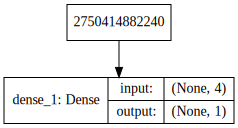

In [7]:
SVG(model_to_dot(simple_model, show_shapes=True).create(prog='dot', format='svg'))

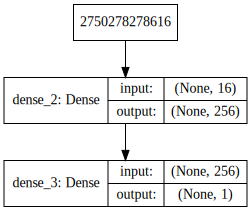

In [13]:
SVG(model_to_dot(deeper_model, show_shapes=True).create(prog='dot', format='svg'))

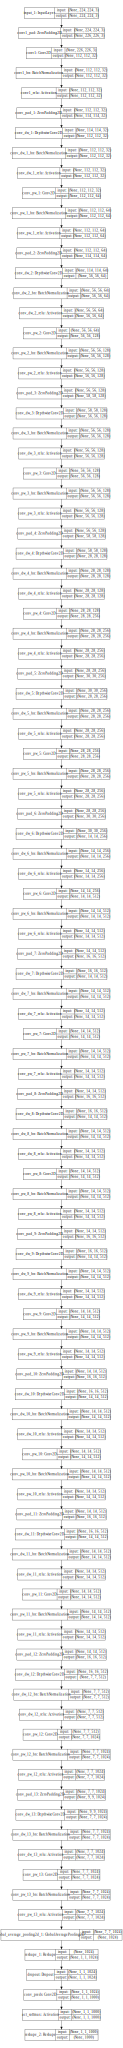

In [4]:
SVG(model_to_dot(mobilenet_model, show_shapes=True).create(prog='dot', format='svg'))

In [ ]:
SVG(model_to_dot(resnet_model, show_shapes=True).create(prog='dot', format='svg'))

### Troubleshooting: Graphviz Installation

If pydot is not able to find `graphviz`, you can try installing graphviz manually.

1. Download and install graphviz binaries from: https://graphviz.gitlab.io/download/
2. Add the path to graphviz to your PATH environment variable, e.g. `C:/Program Files (x86)/Graphviz2.38/bin`
3. Launch a new `Anaconda Prompt` and re-run the Jupyter notebook.

## Training a neural network

A neural network is trained using Stochastic Gradient Descent
  - Forward Propagation to compute the output at each layer
  - Back Propagation to compute gradients
  - Update weights and biases using gradients

### Forward Propagation

For 1 neuron:

$$y = W'g(Wx + b) + b'$$

### Forward Propagation

2 layers of neurons:

$$x_1 = W_1'g(W_1x + b_1) + b_1'$$

$$y = x_2 = W_2'g(W_2x_1 + b_2) + b_2'$$

### Forward Propagation

For layer $l$, single layer operation:

$$x_l = \sigma_l(W_lx_{l-1} + b_1)$$

where $\sigma_l(z) = W_l'g(z) + b_l'$

### Feedforward through Layers

for $l = 1$ to $\,L$:

$\,\,\,\,x_l = \sigma_l(W_lx_{l-1} + b_l)$

Where:
- Number of layers: $L$
- Input: $x_0$, Output: $x_L$
- Note: $x_l$ are tensors with the input & output dimensions of that layer

### Backward Propagation

Objective
- Compute the gradients of the cost function $J$ w.r.t. to $W^j_l$ and $b^j_l$ (layer $l$, neuron $j$)
  - Partial derivatives $\frac{\partial J}{\partial W^j_l}$, $\frac{\partial J}{\partial b^j_l}$ 
- E.g. quadratic cost function, $n$ training samples, output $x_L$:
$$J({W_l},{b_l}) = \frac{1}{2n}\sum_{i=1}^n {\|y^i - x_{L}^i\|}^2$$



### Backward Propagation

1. Feedforward from layer 1 to L
2. Compute the output error vector at layer L ($\delta_L$)
3. Backward propagate the error (backwards from layer L-1, .. 1) to compute per-layer error vectors ($\delta_l$)
4. Compute gradient of cost function for layer $l$, neuron $j$:
$$\frac{\partial J}{\partial W_l^j} = x_{l-1}^j\delta_l^j$$
$$\frac{\partial J}{\partial b_l^j} = \delta_l^j$$

### Gradient Descent Update Rule

$$W_l^j := W_l^j + \epsilon \frac{\partial J}{W_l^j}$$

$$b_l^j := b_l^j + \epsilon \frac{\partial J}{b_l^j}$$

$\epsilon$ = learning rate

## Workshop: Neural Network for Logistic Regression

In this workshop, you'll train a neural network to perform logistic regression on the MNIST dataset.

Credits: https://medium.com/@the1ju/simple-logistic-regression-using-keras-249e0cc9a970

In [14]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import backend as K

In [15]:
# Training settings
BATCH_SIZE = 128
NUM_CLASSES = 10
EPOCHS = 30

# Input size settings
IMG_ROWS = 28 # 28 pixels wide
IMG_COLS = 28 # 28 pixels high

In [16]:
# Import the dataset, split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [37]:
# Input processing
input_dim = IMG_ROWS * IMG_COLS
X_train = X_train.reshape(60000, input_dim) 
X_test = X_test.reshape(10000, input_dim) 

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255 # scale to between 0 and 1 (pixel: 0-255)
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 784)
(60000, 784) train samples
(10000, 784) test samples


In [20]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

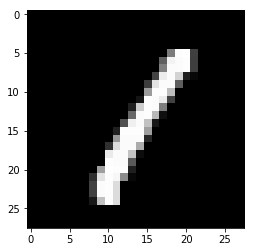

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [38]:
import matplotlib.pyplot as plt
(X_train1, y_train1), (X_test1, y_test1) = mnist.load_data()
plt.imshow(X_train1[3, :, :], cmap=plt.cm.gray)
plt.show()
print(X_train1[3, :, :]/255)

In [39]:
# We are doing multi-class classification
# Convert class vectors to binary class matrices
y_train_cat = keras.utils.to_categorical(y_train, NUM_CLASSES)
y_test_cat = keras.utils.to_categorical(y_test, NUM_CLASSES)

# Show how the classes look like
print('y_train shape:', y_train_cat.shape)
print('First y_train sample:', y_train_cat[1])

y_train shape: (60000, 10)
First y_train sample: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [42]:
# Create the model
from keras.layers import Activation

model = Sequential() 
model.add(Dense(NUM_CLASSES, input_dim=input_dim))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                7850      
_________________________________________________________________
activation_50 (Activation)   (None, 10)                0         
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


### Exercise: Training the Neural Network

1. Compile the model
2. Train the model using `sgd`, minibatch size 128 
  - Training set: `X_train`, `y_train_cat`
  - Test set: `X_test`, `y_test_cat`
3. Plot the learning curve, using the accuracy metrics
4. Analyze the learning curve to determine if overfitting or underfitting occurred. 
  - If overfitting occurred, which epoch can training stop
  - If underfitting occurred, train more epochs to determine what the optimum number of epochs should be

How to get the accuracy metrics:
```
history = model.fit(..., metrics=['accuracy'])
...
loss = history.history['loss']
val_loss = history.history['val_loss']

```

You may reference this example for steps 1 and 2: https://medium.com/@the1ju/simple-logistic-regression-using-keras-249e0cc9a970

In [45]:
# Compile and train model
# Your code here

model.compile(optimizer='sgd',
              loss='categorical_crossentropy', metrics=['accuracy']) 

history = model.fit(X_train, y_train_cat, batch_size=BATCH_SIZE,
                    nb_epoch=EPOCHS,
                    verbose=1,
                    validation_data=(X_test, y_test_cat)) 

score = model.evaluate(X_test, y_test_cat, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

pred = model.predict(X_test)


C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds03\lib\site-packages\ipykernel_launcher.py:10: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  # Remove the CWD from sys.path while we load stuff.


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 2s 37us/step - loss: 0.3302 - acc: 0.9083 - val_loss: 0.3158 - val_acc: 0.9131
Epoch 2/30
60000/60000 [==============================] - 1s 25us/step - loss: 0.3286 - acc: 0.9084 - val_loss: 0.3148 - val_acc: 0.9136
Epoch 3/30
60000/60000 [==============================] - 2s 26us/step - loss: 0.3272 - acc: 0.9089 - val_loss: 0.3135 - val_acc: 0.9135
Epoch 4/30
60000/60000 [==============================] - 2s 26us/step - loss: 0.3258 - acc: 0.9092 - val_loss: 0.3124 - val_acc: 0.9141
Epoch 5/30
60000/60000 [==============================] - 1s 25us/step - loss: 0.3245 - acc: 0.9097 - val_loss: 0.3116 - val_acc: 0.9139
Epoch 6/30
60000/60000 [==============================] - 2s 25us/step - loss: 0.3232 - acc: 0.9102 - val_loss: 0.3101 - val_acc: 0.9142
Epoch 7/30
60000/60000 [==============================] - 2s 25us/step - loss: 0.3220 - acc: 0.9104 - val_loss: 0.3092 - val_acc

In [47]:
pred = model.predict(X_test)
print(pred)

pred_classes = model.predict_classes(X_test)
print(pred_classes)

[[1.1498269e-04 4.5846019e-08 1.9136177e-04 ... 9.9565911e-01
  6.2478946e-05 9.3010254e-04]
 [7.0797368e-03 5.1099942e-05 9.3618983e-01 ... 1.8436213e-09
  3.5614127e-03 1.8929062e-07]
 [3.9150655e-05 9.6840793e-01 1.2529512e-02 ... 3.8375366e-03
  5.4891328e-03 7.9057424e-04]
 ...
 [6.4495259e-07 2.2085803e-06 5.6511599e-05 ... 3.2392254e-03
  1.1770742e-02 2.9607944e-02]
 [6.1998767e-04 1.3496276e-03 3.6090415e-04 ... 9.2046044e-05
  2.2379503e-01 2.1806388e-04]
 [1.2568546e-04 5.8645111e-10 4.3868180e-04 ... 3.5031975e-09
  2.1131418e-06 1.1369509e-07]]
[7 2 1 ... 4 5 6]


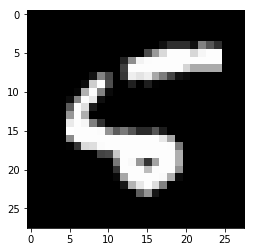

prediction [7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]
truth [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
[3.6665683e-03 1.7794478e-05 8.5333716e-03 2.4363876e-06 8.3781360e-03
 6.7959335e-03 9.6993726e-01 1.9222821e-06 2.3894997e-03 2.7708069e-04]
6
5


In [69]:
(X_train3, y_train3), (X_test3, y_test3) = mnist.load_data()

test = X_test3[:20]
plt.imshow(test[8], cmap=plt.cm.gray)
plt.show()

# preprocessing
test = test.reshape(test.shape[0], input_dim) 
test = test.astype('float32')
test /= 255

predicted_numbers = model.predict_classes(test)
predicted_prob = model.predict(test)

print('prediction', predicted_numbers)
print('truth', y_test3[:20])

print(predicted_prob[8])
print(predicted_numbers[8])
print(y_test3[8])

In [ ]:
# Plot learning curve
# Your code here
















## Reading List

|Material|Read it for|URL
|--|--|--|
|Lecture 1: Deep Learning Challenge. Is There Theory?|Intro to Deep Learning|https://stats385.github.io/lecture_slides (lecture 1)|
|Lecture 2: Overview of Deep Learning from a Practical Point of View|More background on Neural Nets|https://stats385.github.io/lecture_slides (lecture 2)|
|Neural Networks and Deep Learning, Chapter 2|Understanding Back Propagation|http://neuralnetworksanddeeplearning.com/chap2.html|
|Guide to the Sequential Model|Basic usage of Keras for neural net training|https://keras.io/getting-started/sequential-model-guide/|